In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [71]:
df=pd.read_csv('EasyVisa.csv')
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [72]:
df.shape


(25480, 12)

In [73]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [74]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [76]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Showing the null values using the help of missingo library for better visualizations

In [77]:
!pip install missingno

<Axes: >

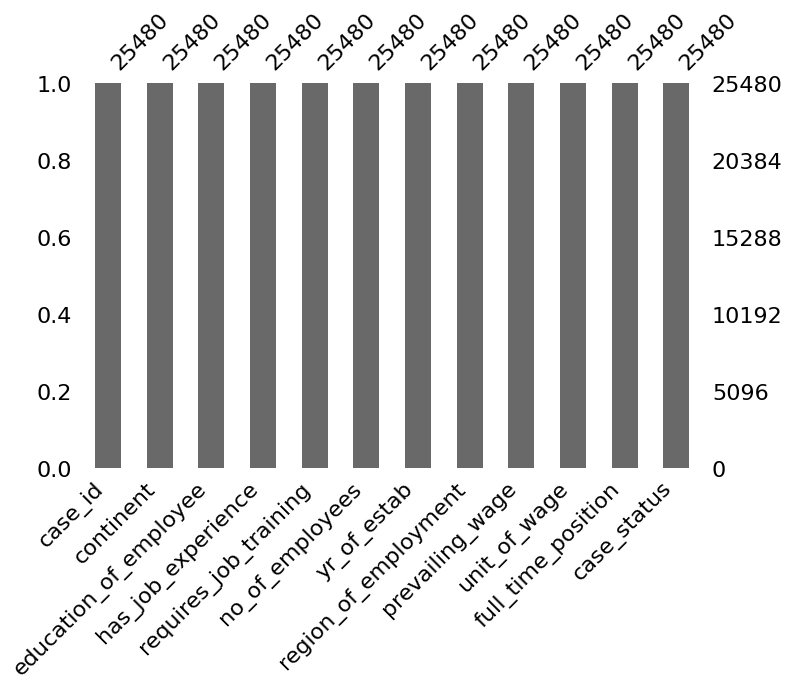

In [78]:
import missingno
missingno.bar(df, figsize=(8,5))

As you can see there is no null values
If there will be any null values, it will be visualized like a zigzag shape

In [79]:
df.duplicated().sum()

0

In [80]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Finding out all Numerical and Categorical columns differently

In [81]:
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']

categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

In [82]:
print(f" We have {len(numeric_features)} number of numerical features ",numeric_features)
print(f" We have {len(categorical_features)} number of numerical features ",categorical_features)

 We have 3 number of numerical features  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
 We have 9 number of numerical features  ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


# Properties of count data on cetegoriccal columns in percentage

In [83]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------------')
    print('')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------------

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------------

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------------

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------------

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------------



From the above:
We have to drop user-id column, cause it has no importance.
On the continent column, as you can see Asia is 66 percentage. So it is biased. So we have to merge all of the other continents, to form a single category
unit_of_wage seems to be an important columns as most of them are yearly contracts

# Univariate Analysis

In [84]:
numeric_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

kde plot --> It is mainly used for univariate analysis.
It is a method for visualizing the distribution of ovservations in a dataset.
As if our data is leftly skewed, rightly skewed or have a proper distribution.


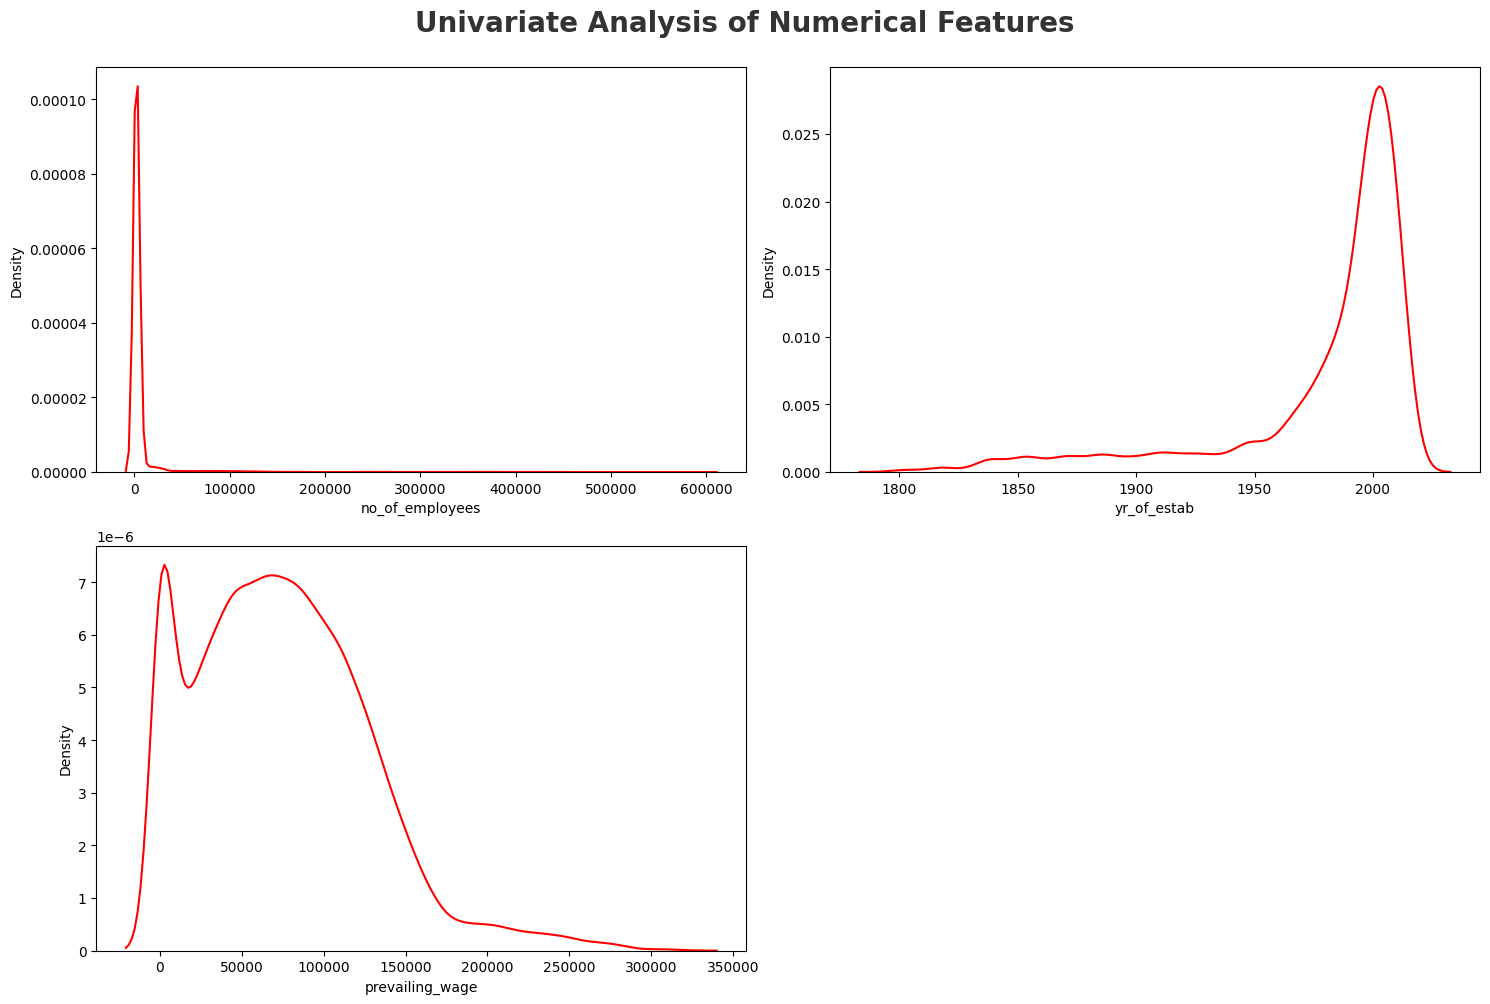

In [85]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=0.8, y=1.) 
for i in range(0, len(numeric_features)):
    plt.subplot(2,2, i+1)
    sn.kdeplot(x=df[numeric_features[i]], color='red')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [86]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

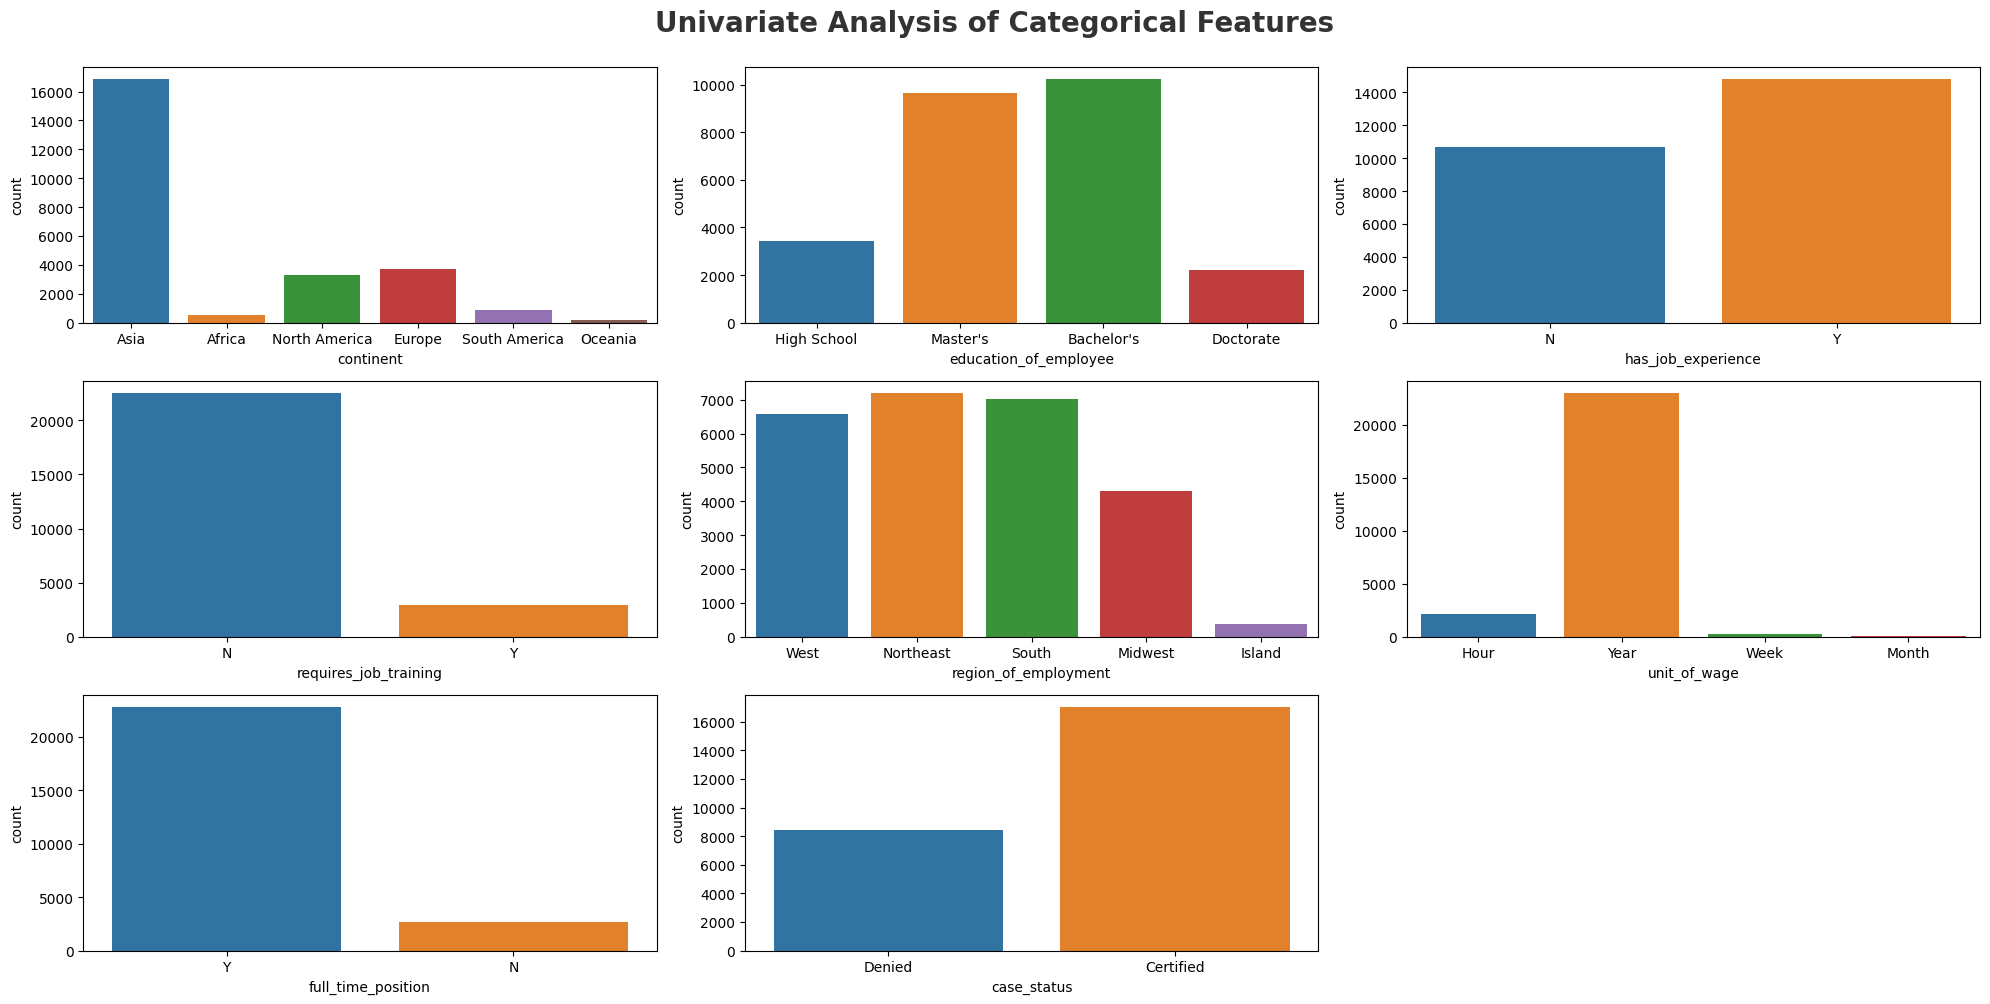

In [87]:
categorical_features.remove('case_id')
plt.figure(figsize=(20,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold',alpha=0.8, y=1.) 

for i in range(0, len(categorical_features)):
    plt.subplot(3,3, i+1)
    sn.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# Multivariate Analysis

In [88]:
discrete_features=[feature for feature in numeric_features if len(df[feature]. unique())<=25]

continues_features=[feature for feature in numeric_features if len(df[feature]. unique())>25]

print(f"We have {len(discrete_features)} number of discrete features: ",discrete_features)
print(f"We have {len(continues_features)} number of continues features: ",continues_features)

We have 0 number of discrete features:  []
We have 3 number of continues features:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [89]:
df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<Axes: >

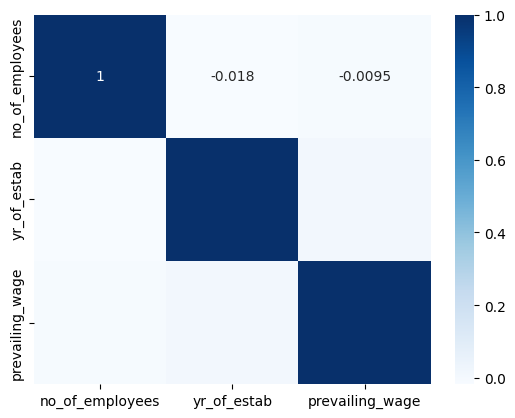

In [90]:
sn.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

For categorical columns:
Chi-square feature selection is a statistical method for selecting features from a dataset. It's a common method for selecting features from text data.
The chi-squared (χ²) test is a statistical test used to determine whether there is a significant association between two categorical variables. It's based on the difference between the expected frequencies (under the null hypothesis of independence) and the observed frequencies in one or more categories.

Here's how the chi-squared test generally works:

Null Hypothesis (H₀): The null hypothesis assumes that there is no association between the categorical variables. In other words, the variables are independent.

Alternative Hypothesis (Hₐ): The alternative hypothesis suggests that there is an association between the categorical variables.

Calculating the Test Statistic (χ²): The chi-squared test statistic (χ²) is calculated based on the observed and expected frequencies in each category. It measures the discrepancy between the observed and expected frequencies under the assumption of independence.

Determining the P-value: Once the test statistic is calculated, the p-value is determined. The p-value represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming that the null hypothesis is true. A low p-value (typically below a chosen significance level, often 0.05) indicates that the null hypothesis should be rejected in favor of the alternative hypothesis.

Interpreting the Results: If the p-value is less than the chosen significance level, the null hypothesis is rejected, and it is concluded that there is a significant association between the variables. If the p-value is greater than the significance level, there is insufficient evidence to reject the null hypothesis, and it is concluded that there is no significant association between the variables.

The chi-squared test is commonly used in various fields, including biology, social sciences, business, and many others, to analyze categorical data and assess relationships between variables. It's important to note that the chi-squared test assumes certain conditions, such as the independence of observations and an adequate sample size, for reliable results. Additionally, extensions of the chi-squared test exist for more complex scenarios, such as testing for independence in contingency tables with more than two dimensions.

In [91]:
from scipy.stats import chi2_contingency

In [92]:
from scipy.stats import chi2_contingency

chi2_test=[]

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

result=pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


 we can consider that requires_job_training has no co-relation with the labeled column

# Visualizing the Outliers and the Boxplots

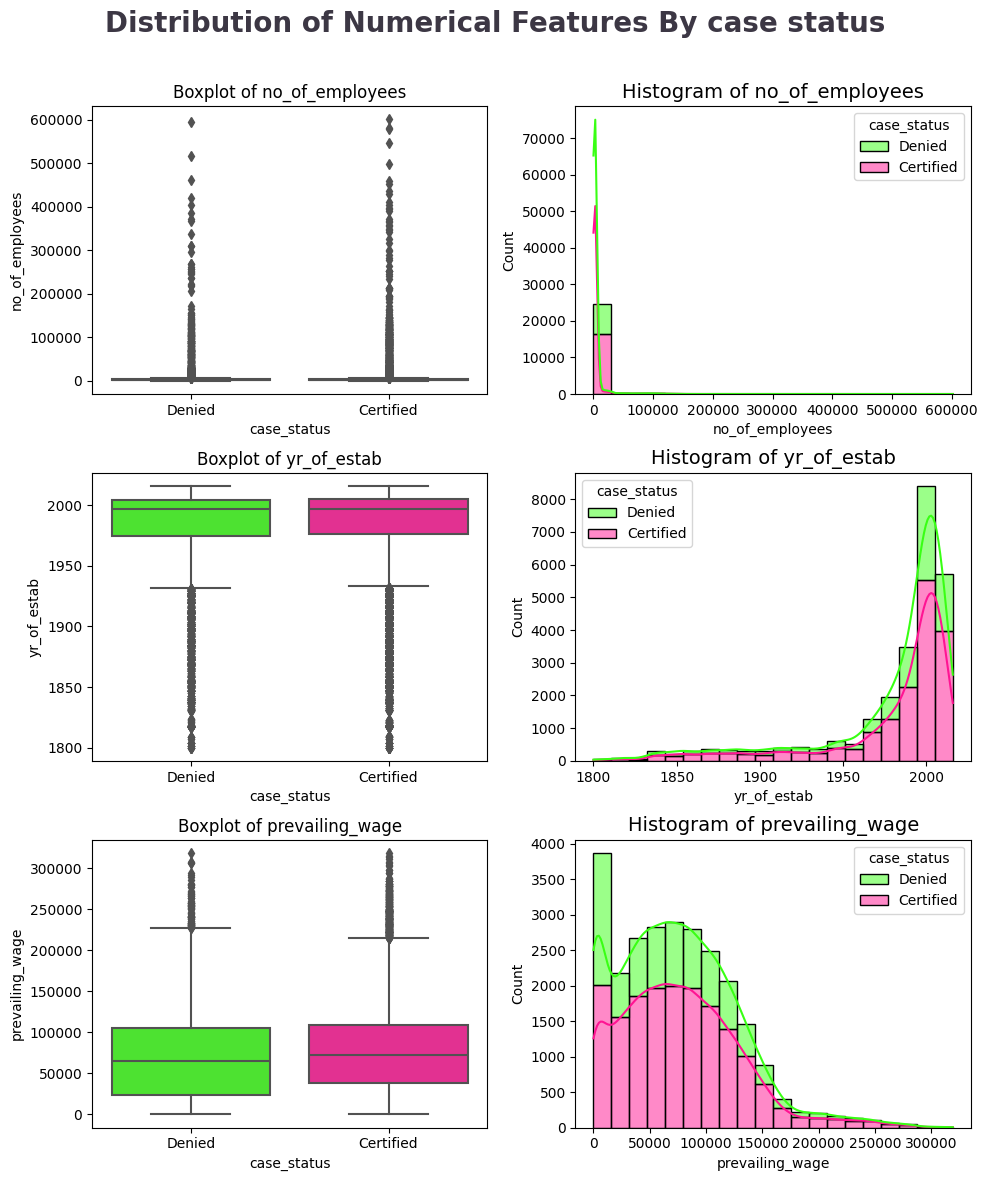

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom neon color palette
neon_palette = ["#39FF14", "#FF1493"]  # Example neon colors: green and pink

# Rest of your code
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Distribution of Numerical Features By case status', color='#3C3744', fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continues_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=neon_palette, ax=ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of {col}", fontsize=12)
    
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=neon_palette, ax=ax[i, 1])
    ax[i, 1].set_title(f"Histogram of {col}", fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()


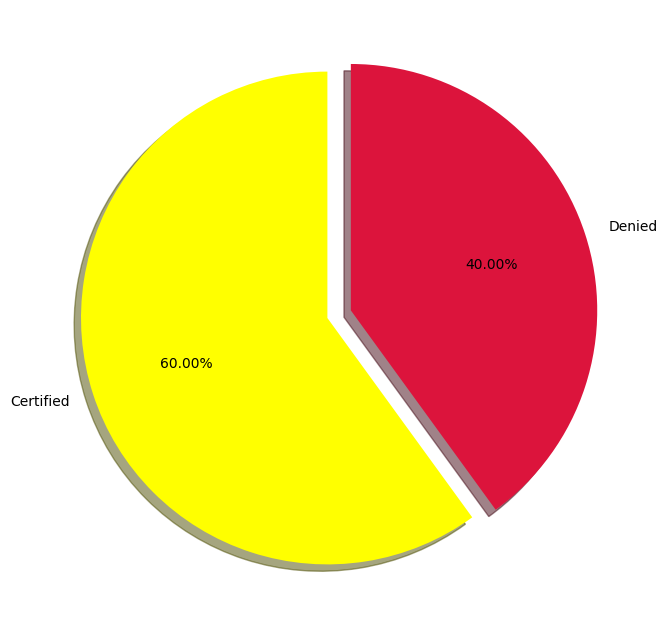

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({
    'case_status': ['Certified', 'Certified', 'Denied', 'Certified', 'Denied']
})

percentage = df['case_status'].value_counts(normalize=True) * 100
labels = ["Certified", "Denied"]

# Plot pie chart with matplotlib library
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors
colors = ['#FFFF00', '#DC143C'] 

explode = (0, 0.1)

ax.pie(percentage, labels=labels, startangle=90, autopct="%1.2f%%", explode=explode, shadow=True, colors=colors)

plt.show()


In [95]:
df.head()

,case_status
0,Certified
1,Certified
2,Denied
3,Certified
4,Denied


#  Does applicant's Continent has any impact on Visa Status?

In [101]:
df=pd.read_csv('EasyVisa.csv')

df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

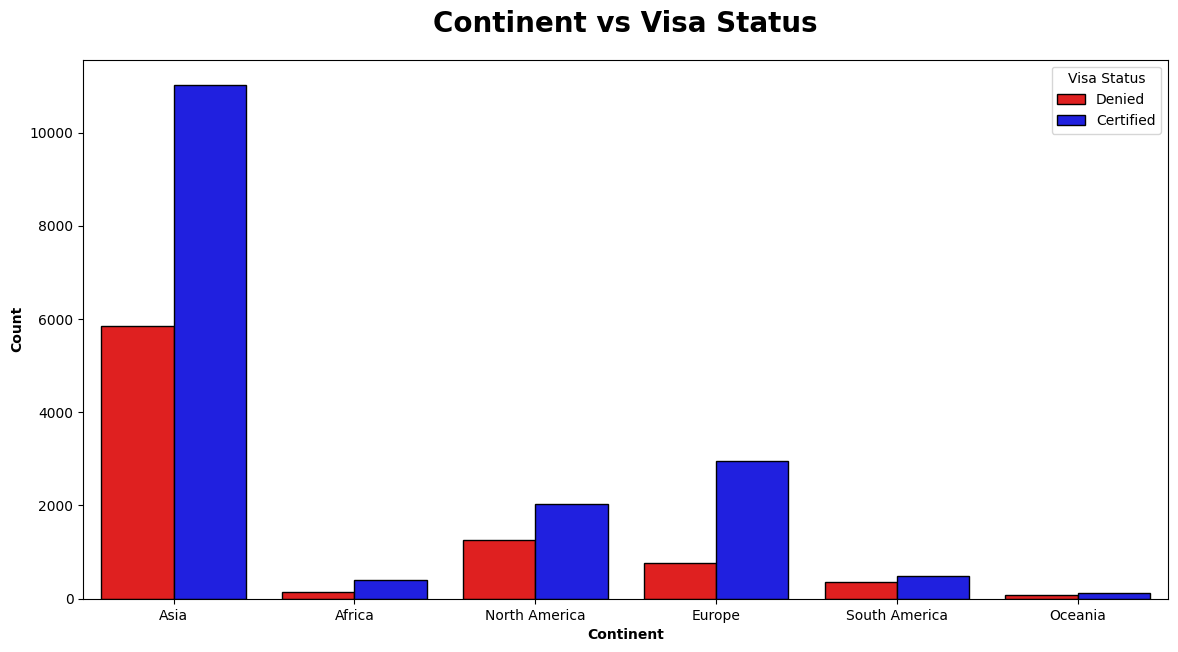

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(14, 7))

# Define custom palette with red and blue colors
custom_palette = ["red", "blue"]

sns.countplot(x='continent', hue='case_status', data=df, ec='black', palette=custom_palette)

plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel('Continent', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show()


In [103]:
df2=df.copy()

In [104]:
df2.head(1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied


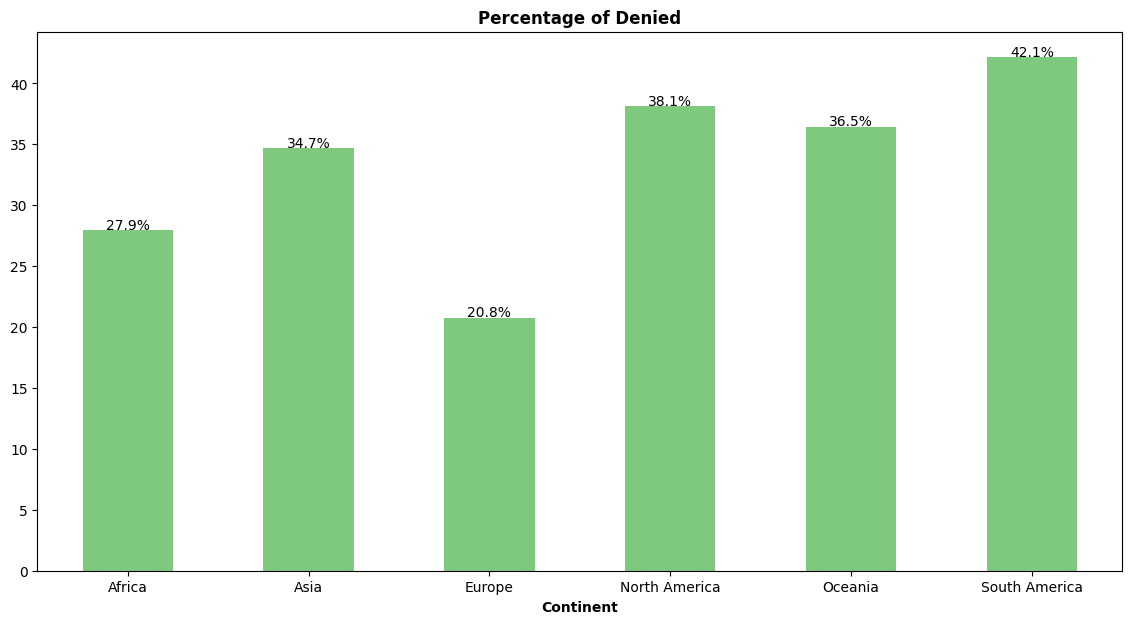

In [108]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Denied'])]['continent'].value_counts() / df2['continent'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

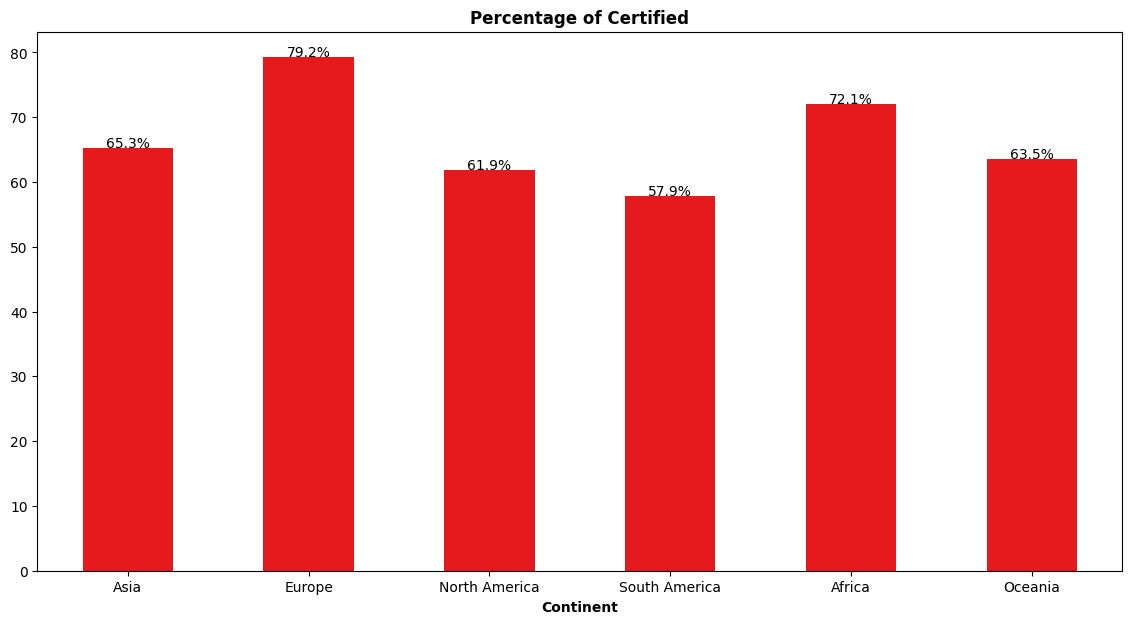

In [109]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Certified'])]['continent'].value_counts() / df2['continent'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

# Does applicant's Education has any impact on Visa Status?

In [110]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

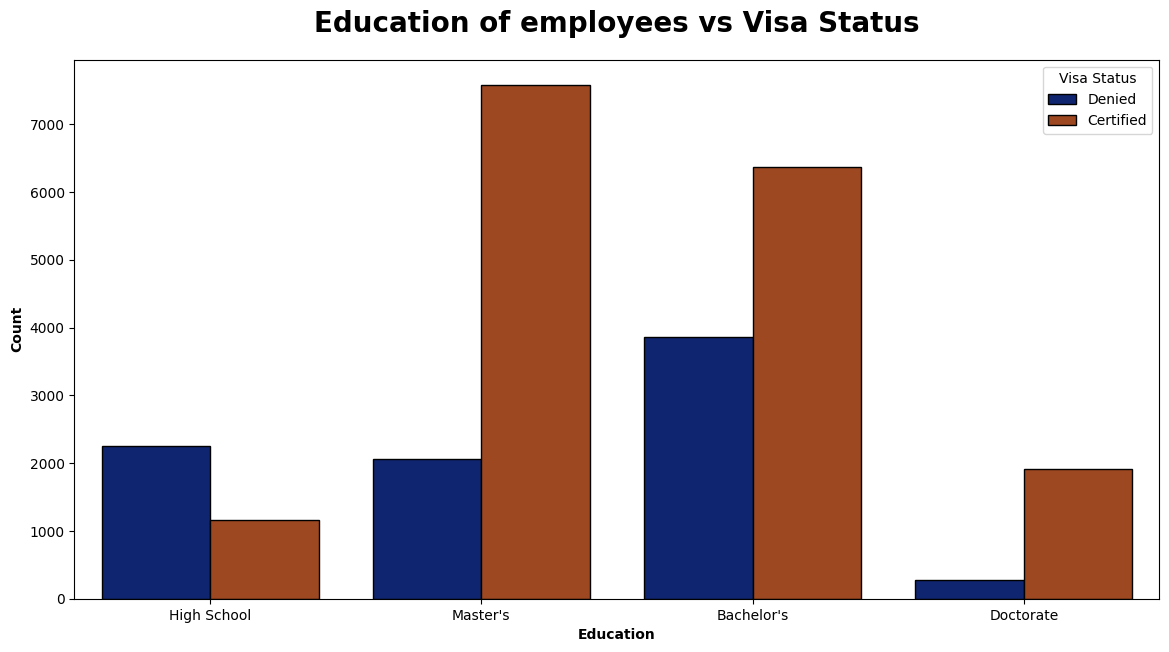

In [111]:
plt.subplots(figsize=(14,7))
sn.countplot(x='education_of_employee', hue='case_status', data=df, ec='black',palette="dark")

plt.title("Education of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Education', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show()

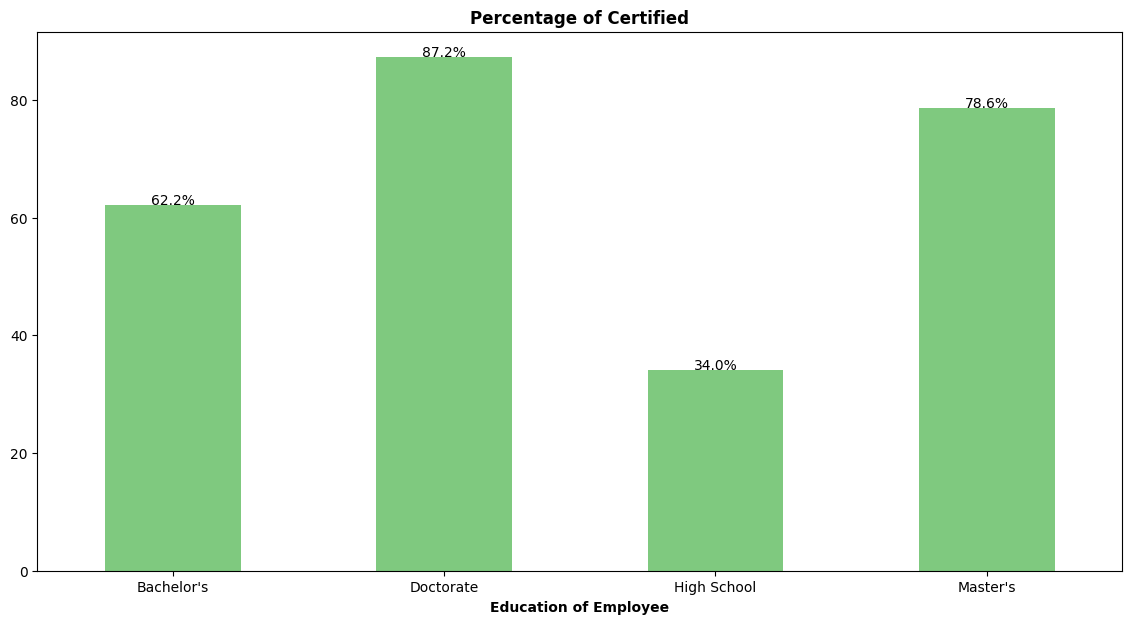

In [112]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts() / df2['education_of_employee'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Education of Employee', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

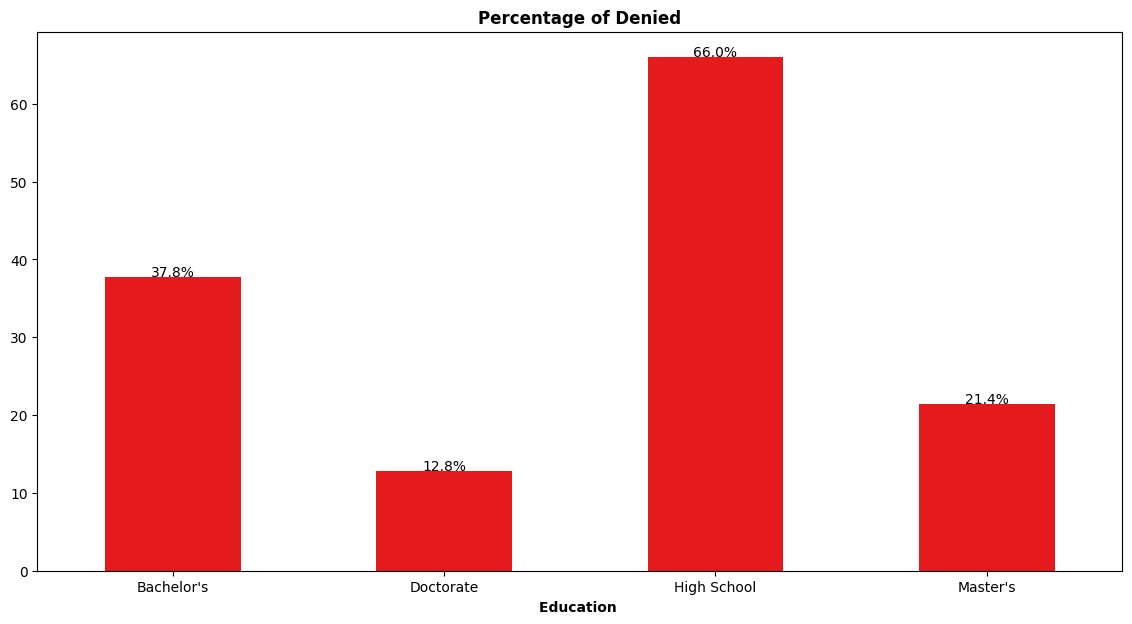

In [113]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Denied'])]['education_of_employee'].value_counts() / df2['education_of_employee'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Education ', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

# Does applicant's Previous work experience has any impact on Visa Status?

In [114]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

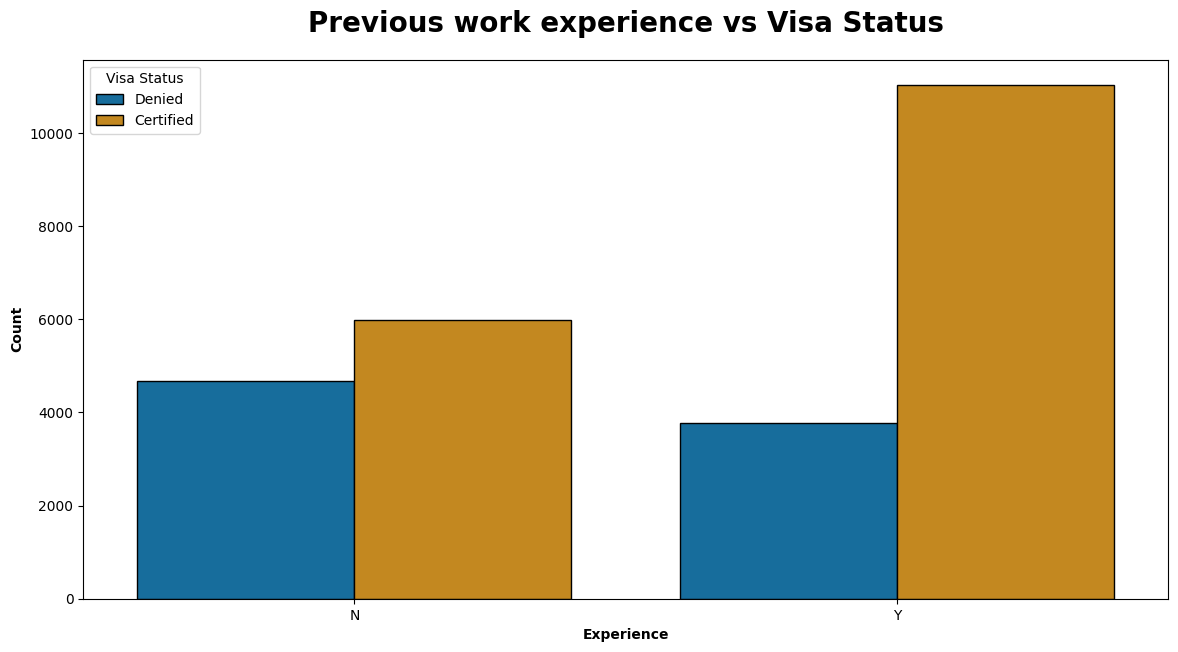

In [115]:
plt.subplots(figsize=(14,7))
sn.countplot(x='has_job_experience', hue='case_status', data=df, ec='black',palette="colorblind")

plt.title("Previous work experience vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Experience', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show()

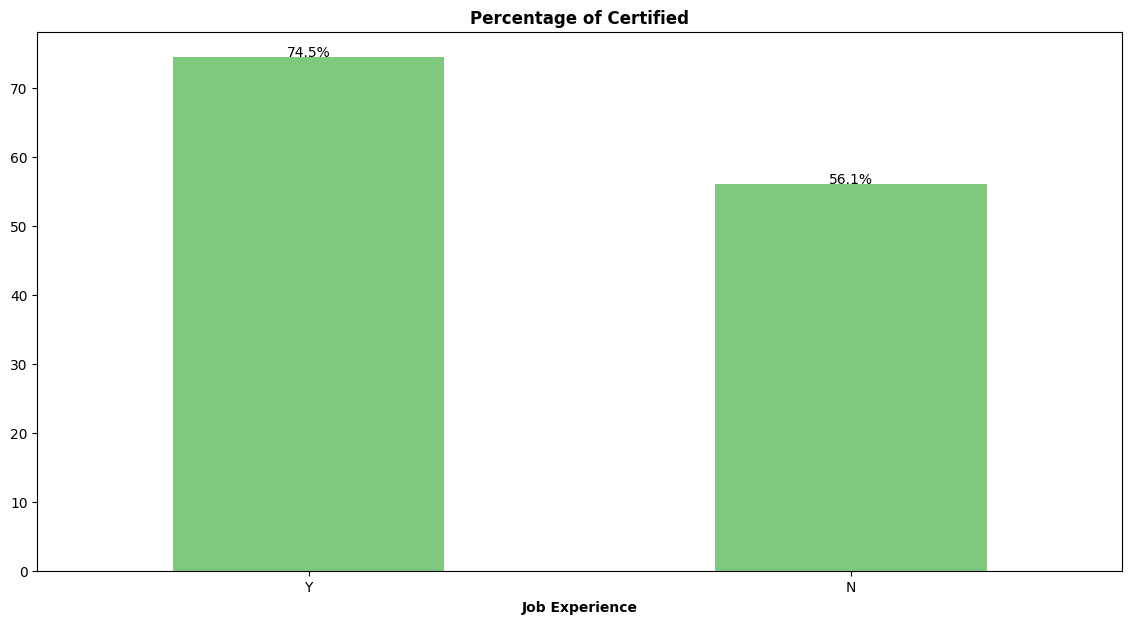

In [116]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Certified'])]['has_job_experience'].value_counts() / df2['has_job_experience'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Experience', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

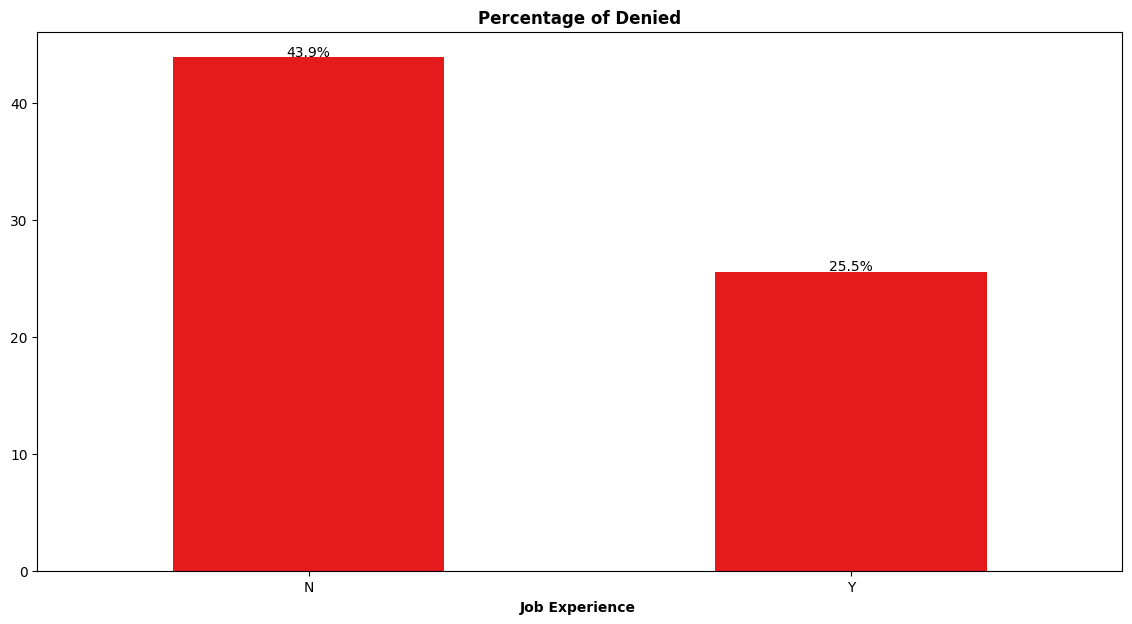

In [117]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Denied'])]['has_job_experience'].value_counts() / df2['has_job_experience'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Experience ', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

#  Does applicant's Job training experience has any impact on Visa Status?

In [118]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

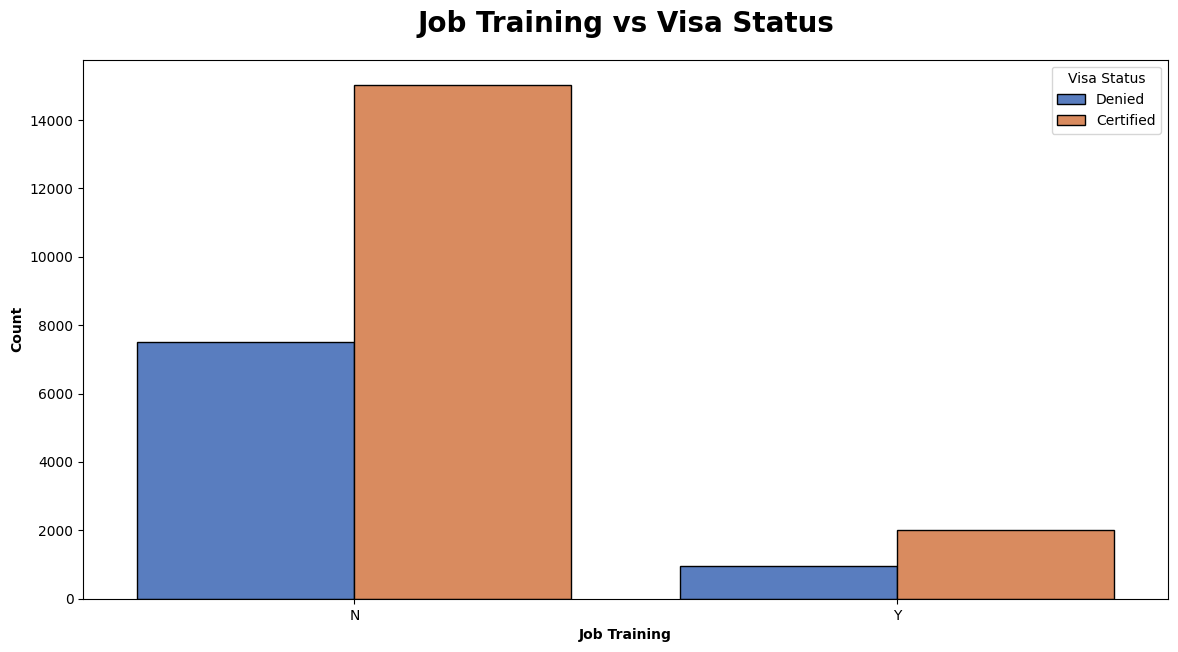

In [119]:
plt.subplots(figsize=(14,7))
sn.countplot(x='requires_job_training', hue='case_status', data=df, ec='black',palette="muted")

plt.title("Job Training vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Job Training', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show()

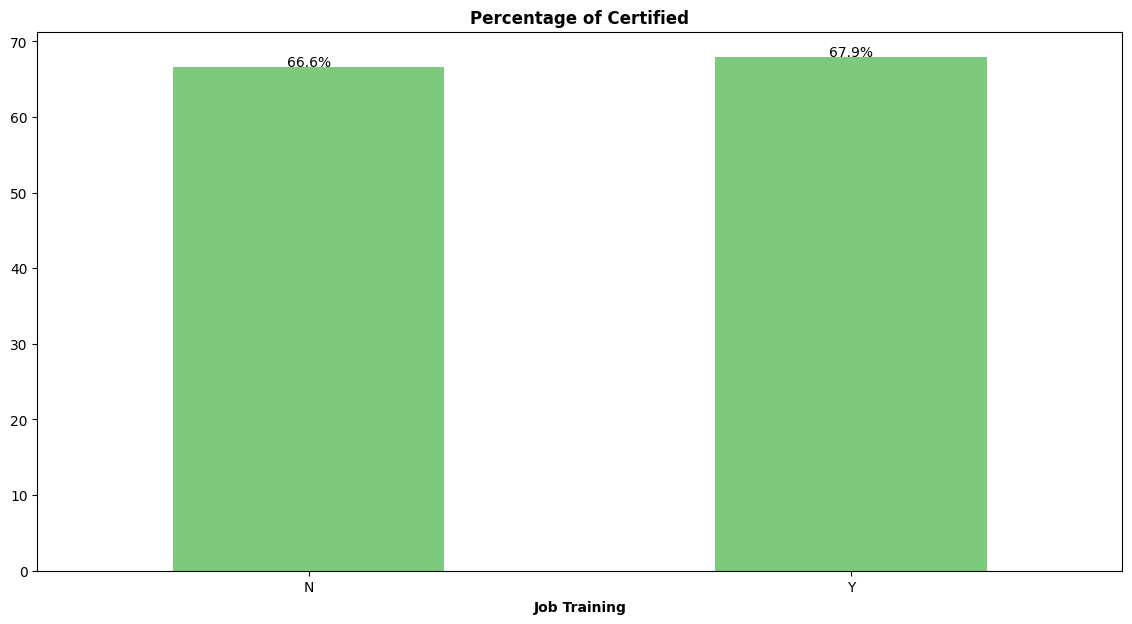

In [120]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts() / df2['requires_job_training'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Training', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

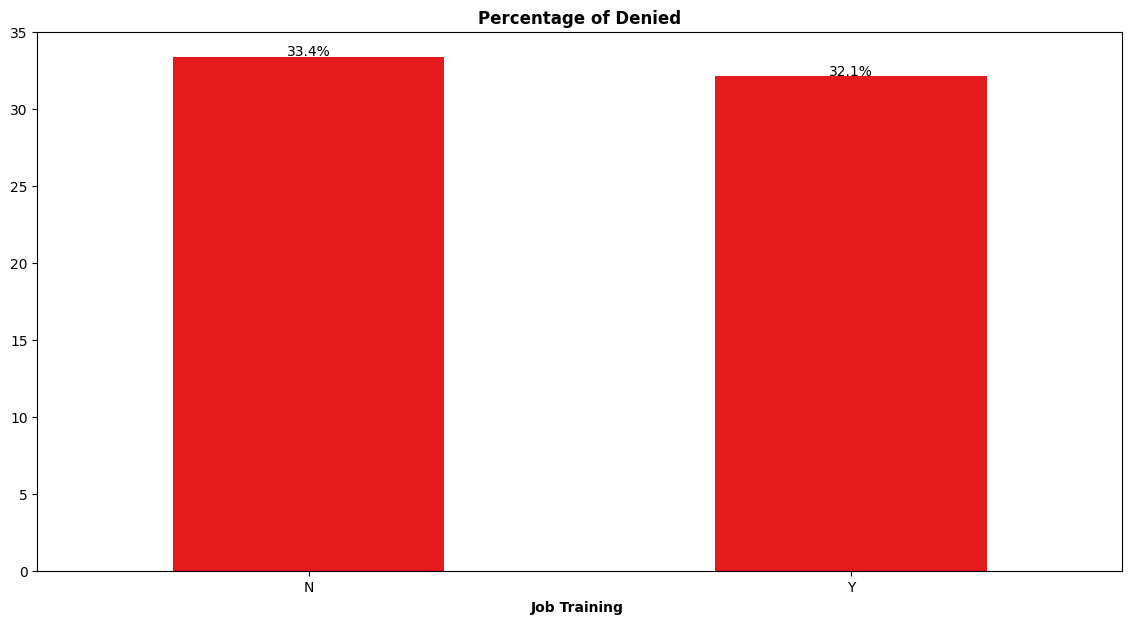

In [121]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Denied'])]['requires_job_training'].value_counts() / df2['requires_job_training'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Training ', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

# Does Number of employees of employer has any impact on Visa Status?

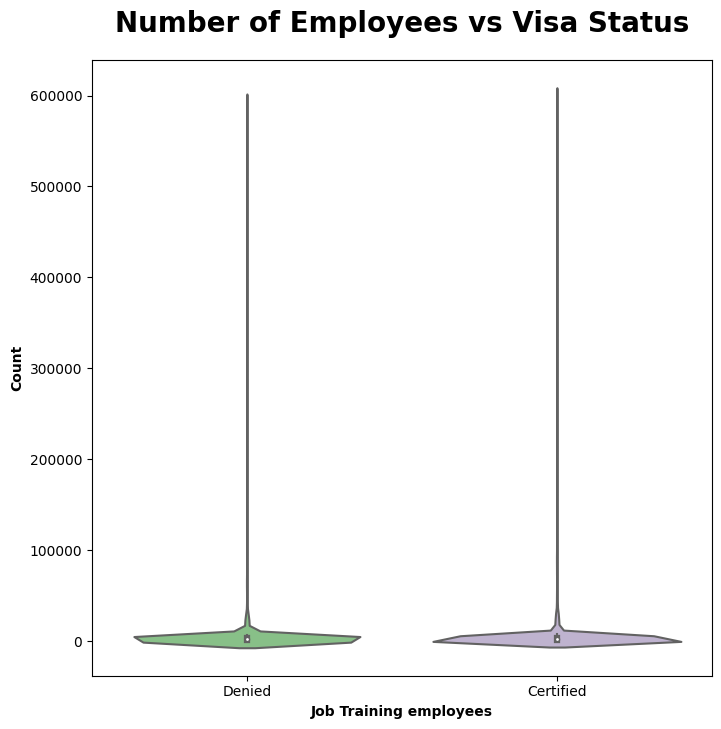

In [122]:
plt.subplots(figsize=(8,8))
sn.violinplot(x='case_status', y='no_of_employees', data=df,palette="Accent")

plt.title("Number of Employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Job Training employees', weight='bold')
plt.ylabel('Count', weight='bold')

plt.ylim()
plt.show()

# Wage and impact on Visa Status

In [123]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

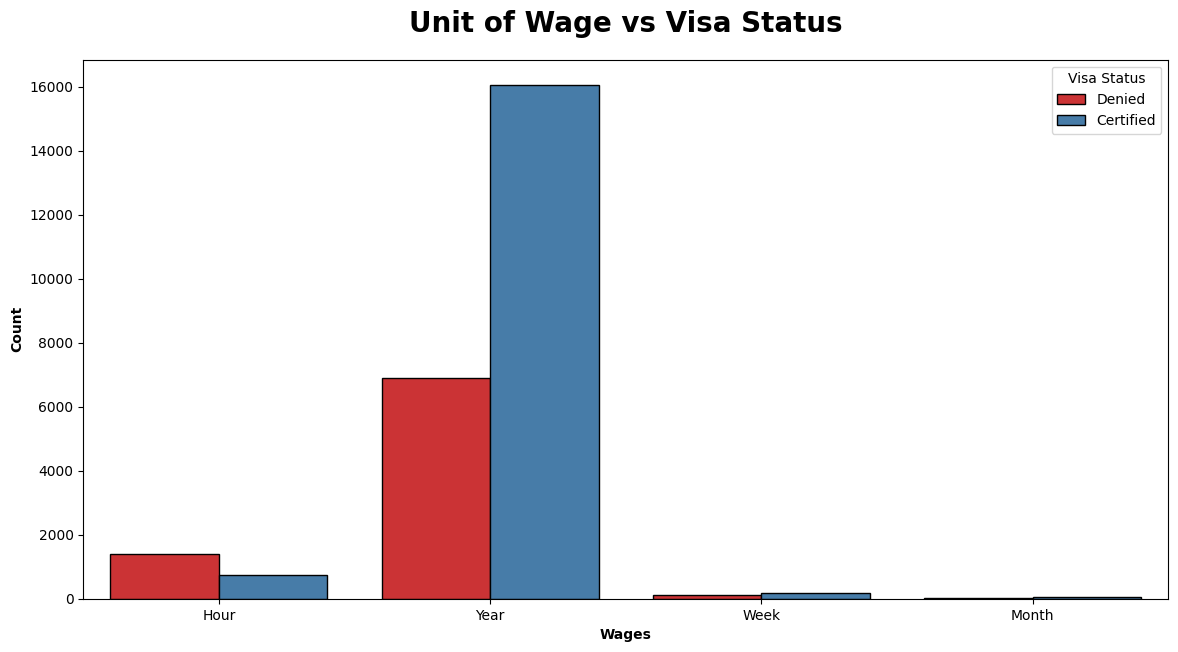

In [124]:
plt.subplots(figsize=(14,7))
sn.countplot(x='unit_of_wage', hue='case_status', data=df, ec='black',palette="Set1")

plt.title("Unit of Wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Wages', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

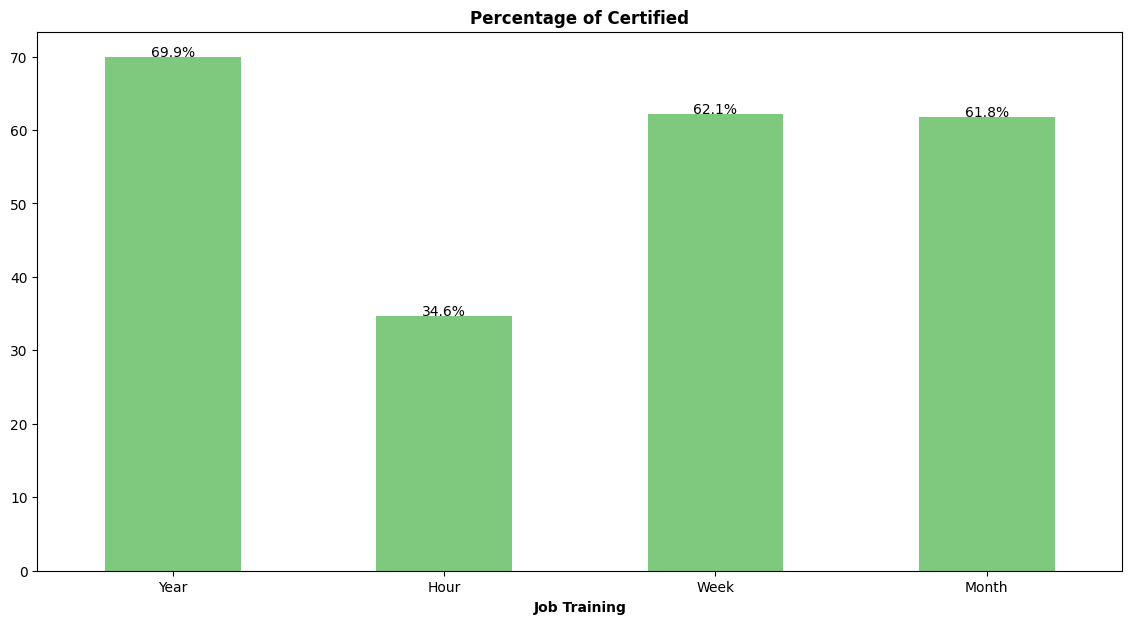

In [125]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts() / df2['unit_of_wage'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Training', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

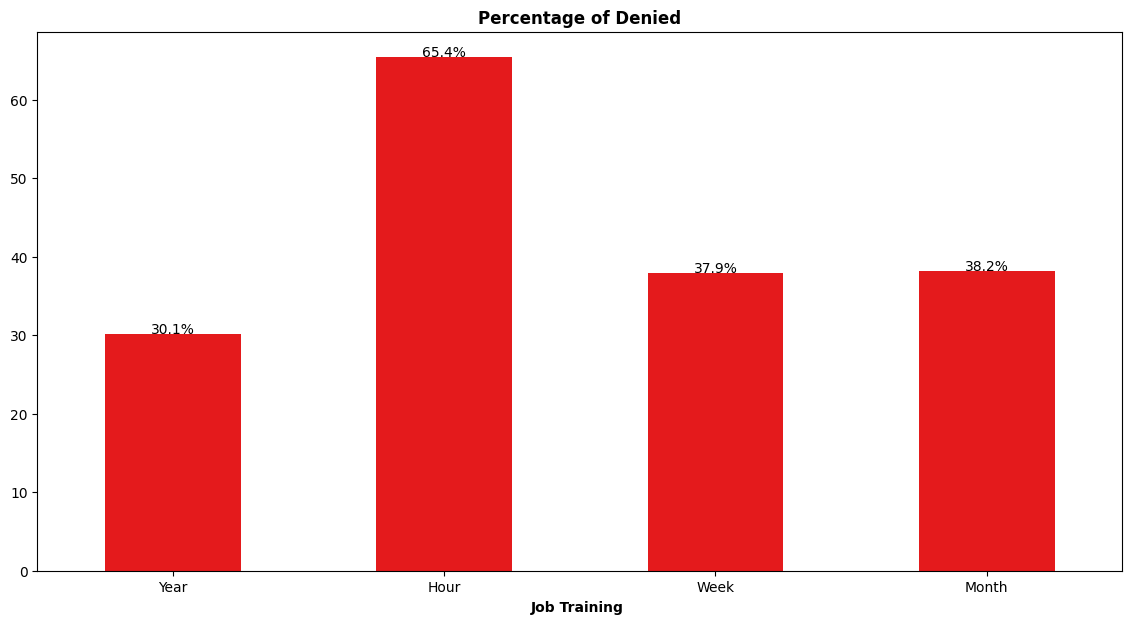

In [126]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Denied'])]['unit_of_wage'].value_counts() / df2['unit_of_wage'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Training ', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

# Does Region of Employment has impact on Visa Status?

In [127]:
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

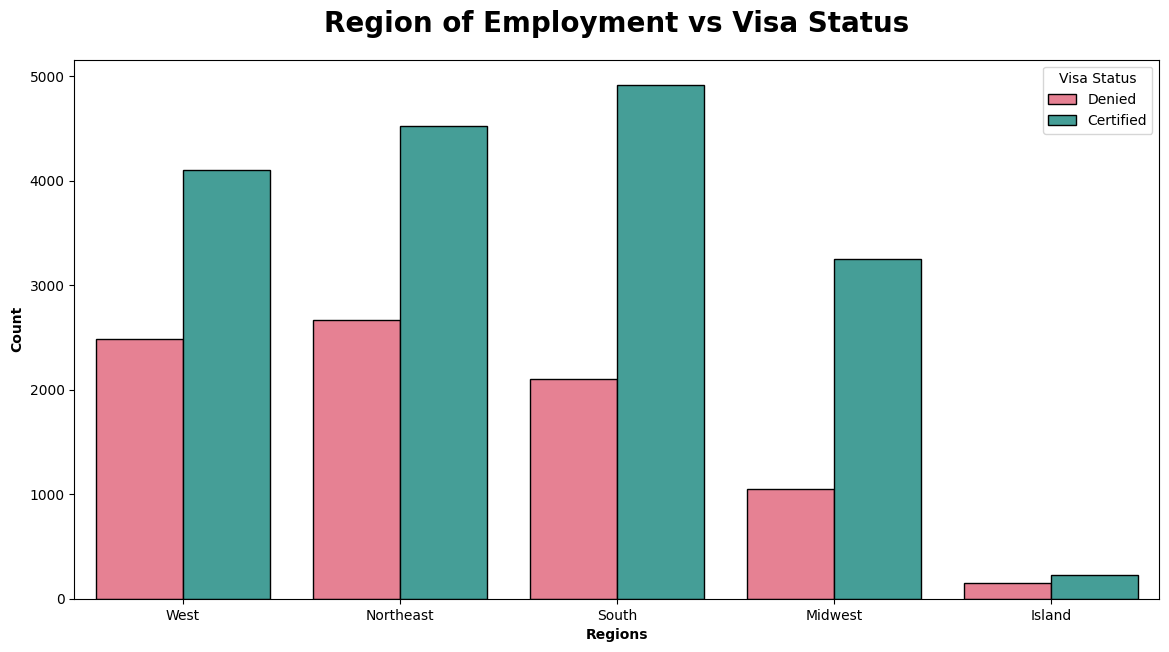

In [128]:
plt.subplots(figsize=(14,7))
sn.countplot(x='region_of_employment', hue='case_status', data=df, ec='k',palette='husl')

plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Regions', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show()

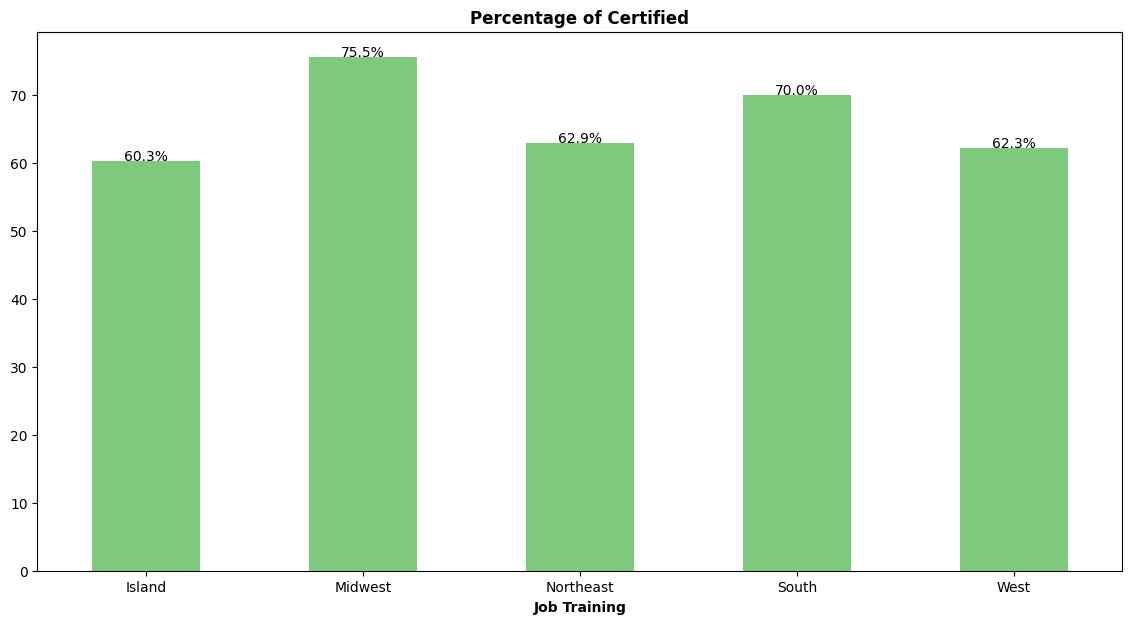

In [129]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified cases by continent
certified_percentages = (100 * df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts() / df2['region_of_employment'].value_counts())

# Plotting the bar plot
certified_percentages.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(certified_percentages.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Training', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

# Does Prevailling wage has any impact on Visa Status?

In [130]:
df.groupby('prevailing_wage')['case_status'].value_counts(normalize=True).to_frame()*100

,,proportion
prevailing_wage,case_status,
2.1367,Certified,100.0
2.9561,Denied,100.0
3.0031,Denied,100.0
3.3188,Denied,100.0
3.4889,Certified,100.0
...,...,...
311734.4900,Certified,100.0
314156.0600,Certified,100.0
315497.6000,Certified,100.0


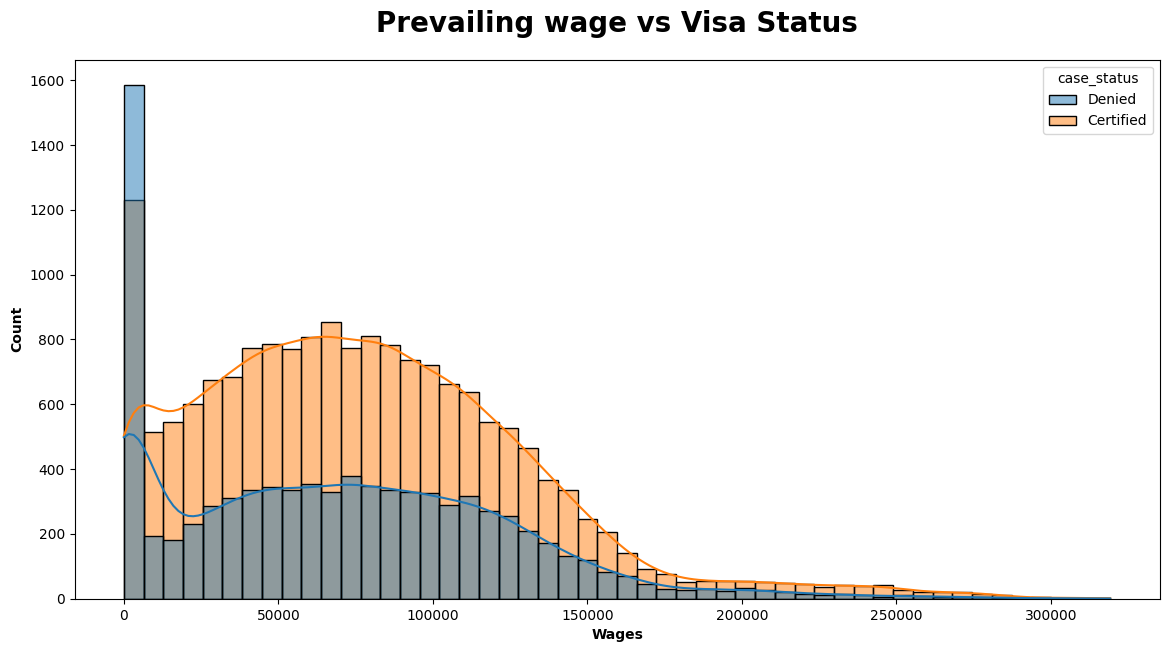

In [131]:
plt.subplots(figsize=(14,7))
sn.histplot(x='prevailing_wage', hue='case_status', data=df, kde=True, bins=50)

plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Wages', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# Prevailling wage based on Education

In [132]:
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


In [ ]:
# plt.subplots(figsize=(14,7))
sn.boxplot(y='education_of_employee', x='prevailing_wage', data=df, palette='bright')


plt.xlabel('Wages', weight='bold')
plt.ylabel('Education', weight='bold')
plt.show()

# Prevailling wage based on job Experience

In [134]:
print('Median Prevailing wage based on Job Experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)

Median Prevailing wage based on Job Experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


Median Prevailing wage based on Job Experience

# Prevailling wage based on Continent

In [135]:
print('Average Privailling wage bason on Continent')
df.groupby('continent')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average Privailling wage bason on Continent


,prevailing_wage
continent,
Asia,76168.880
Africa,75126.310
Oceania,68656.045
North America,64289.875
South America,53511.705
Europe,52073.335


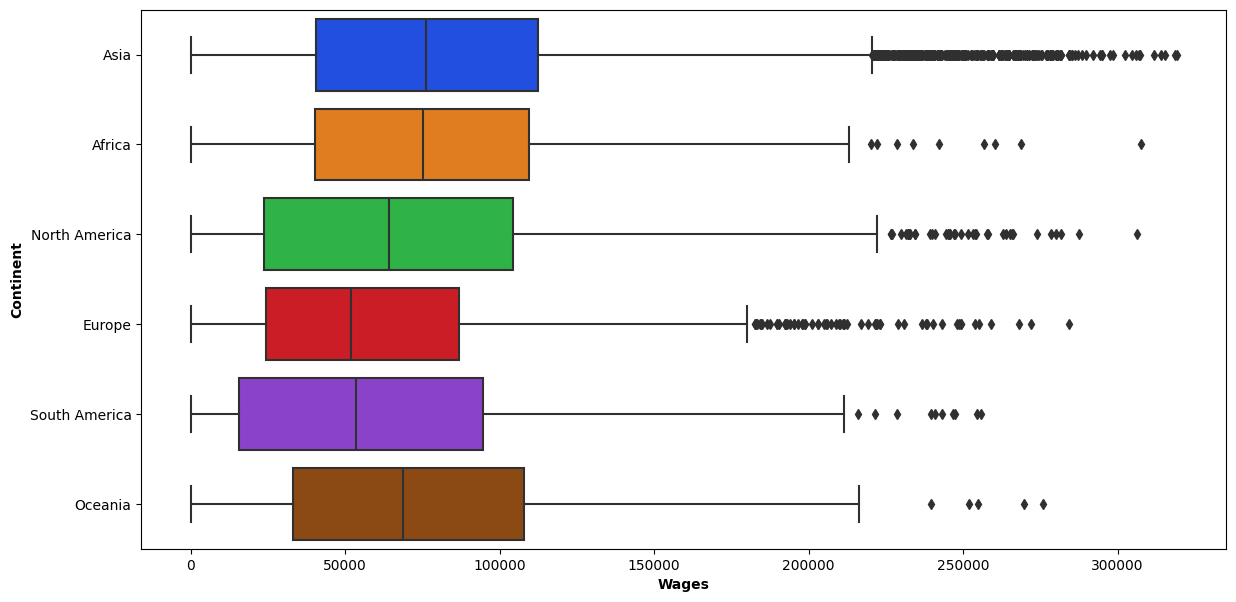

In [136]:
plt.subplots(figsize=(14,7))
sn.boxplot(y='continent', x='prevailing_wage', data=df, palette='bright')


plt.xlabel('Wages', weight='bold')
plt.ylabel('Continent', weight='bold')
plt.show()

case_id column can be dropped as it is an ID
requires_job_training column can be dropped as it doesnot have much impact on target variable, Proved in visualization and chi2 test.
no_of_employees,prevailling_wage columns have outlier which should be handled.
continent columns has few unique values with very less count, which can be made as others.
target column case_status is imbalanced can be handled before model building.